In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#Function to create columns in DF
def df_construct(fare = 50, rate=-2, year_beg = 2020, year_end = 2061, time_interval = 1):
  df = pd.DataFrame(columns = columns)
  df.iloc[:, 0] = np.arange(year_beg, year_end, time_interval)
  df.iloc[:, 1] = df.iloc[:, 0] - year_beg
  df.iloc[0, 2] = fare*12
  df.iloc[1:, 2] = fare*12*df.iloc[1:, 1]
  df.iloc[0, 3] = df.iloc[0, 2]
  df.iloc[1:,3] = df.iloc[1:,2] * (pow(1+rate/100, df.iloc[1:, 1]))
  return df

In [16]:
# 50000$ nonref
year_beg = 2020
year_end = 2061
time_interval = 1
rate = -2
fare = 84
columns = ['year', 'years_passed','total_nonref', 'CI_incl_nonref']

ins_nonref = df_construct(fare, rate)

# 50000$ ref
fare = 139
columns = ['year', 'years_passed','total_ref', 'CI_incl_ref']

ins_ref = df_construct(fare)
ins_ref = ins_ref[['total_ref', 'CI_incl_ref']]

#Concatenate both DF for analysis

ins_sum = pd.concat([ins_nonref, ins_ref], axis=1)
ins_sum.head(2)

#calculate investment profit for difference between 2 fares
investment_rate = 1.03          #about 3% in CELI in 2020

ins_sum['total_dif'] = ins_sum['total_ref']-ins_sum['total_nonref']
ins_sum['investment_3pct'] = ins_sum['total_dif'] * (pow(investment_rate, ins_sum['years_passed']))
ins_sum['investment_5pct'] = ins_sum['total_dif'] * (pow(1.05, ins_sum['years_passed']))
ins_sum.apply(pd.to_numeric)

ins_sum.to_csv('Investment_concatenated.csv', index=False)
ins_sum[ins_sum.year == 2060]

ins = pd.read_csv('Investment_concatenated.csv')
ins.tail(2)

,year,years_passed,total_nonref,CI_incl_nonref,total_ref,CI_incl_ref,total_dif,investment_3pct,investment_5pct
39,2059,39,39312,17878.953347,65052,29585.410896,25740,81519.274530,172580.294714
40,2060,40,40320,17970.640287,66720,29737.130952,26400,86117.797709,185855.702000


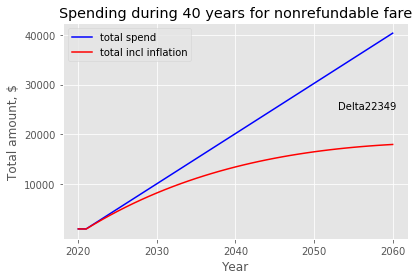

In [17]:
#VISUALISATION

delta = ins.total_nonref.max() - ins.CI_incl_nonref.max()

plt.plot(ins.year, ins.total_nonref, color = 'blue', label = 'total spend')
plt.plot(ins.year, ins.CI_incl_nonref, color='red', label = 'total incl inflation')

plt.xlabel('Year')
plt.ylabel('Total amount, $')
plt.title('Spending during 40 years for nonrefundable fare')
plt.legend(loc='upper left')

plt.annotate('Delta' + str(int(delta)), xy = (2050, 25000), xytext = (2053, 25000))
# plt.annotate('double-headed arrow', xy=(0.45,0.5), xytext=(0.01,0.5), arrowprops={'arrowstyle': '<->'}, va='center')

plt.yticks([10000, 20000, 30000, 40000])
plt.xticks([2020, 2030, 2040, 2050, 2060])

plt.style.use('ggplot')
plt.tight_layout()
plt.savefig('total_vs_inflation.png')
plt.show()

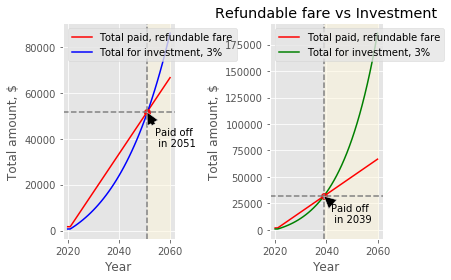

In [24]:
plt.subplot(1, 2, 1)
plt.plot(ins.year, ins.total_ref,color='red', label = 'Total paid, refundable fare')
plt.plot(ins.year, ins.investment_3pct, color='blue', label = 'Total for investment, 3%')

# Intersection point of paid-off with investment 3%
idx = np.argwhere(np.diff(np.sign(ins_sum.total_ref - ins_sum.investment_3pct))).flatten()
plt.plot(ins_sum.year[idx], ins_sum.total_ref[idx], 'ro')

# Annotations:
year = int(ins.year[idx])
amount = int(ins.total_ref[idx])
plt.annotate('Paid off\n in 2051', xy = (year,amount), xytext = (year+3, amount-15000), arrowprops = dict(facecolor='black', shrink=0.01))

# Adding lines
plt.axhline(amount, color = 'grey', linestyle='--')
plt.axvline(year, color='grey', linestyle='--')

# Adding Vertical Spans
plt.axvspan(year, ins.year.max(), alpha=0.5, color='cornsilk')

plt.xlabel('Year')
plt.ylabel('Total amount, $')

plt.legend(loc = 'upper left')

##################

# Investment of investment 5% visualisation
plt.subplot(1, 2, 2)
plt.plot(ins.year, ins.total_ref,color='red', label = 'Total paid, refundable fare')
plt.plot(ins.year, ins.investment_5pct, color='green', label = 'Total for investment, 3%')

# Intersection point of paid-off with investment 5%
idx = np.argwhere(np.diff(np.sign(ins_sum.total_ref - ins_sum.investment_5pct))).flatten()
plt.plot(ins_sum.year[idx], ins_sum.total_ref[idx], 'ro')

# Annotations:
year = int(ins.year[idx])
amount = int(ins.total_ref[idx])
plt.annotate('Paid off\n in 2039', xy = (year,amount), xytext = (year+3, amount-25000), arrowprops = dict(facecolor='black', shrink=0.01))

# Adding lines
plt.axhline(amount, color = 'grey', linestyle='--')
plt.axvline(year, color='grey', linestyle='--')

# Adding Vertical Spans
plt.axvspan(year, ins.year.max(), alpha=0.5, color='cornsilk')

plt.xlabel('Year')
plt.ylabel('Total amount, $')
plt.legend(loc = 'upper left')

plt.title('Refundable fare vs Investment')
# plt.savefig("Paid_off_time.jpg")
plt.tight_layout()
plt.show()

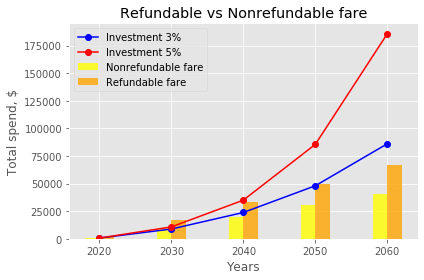

In [27]:
# Visualisation Refundable vs Nonrefundable fare

ins_10 = ins[ins.year % 10 == 0]

width = 2 # the width of the bars

nonref = plt.bar(ins_10.year - width/2, ins_10.total_nonref, width, label='Nonrefundable fare', color='yellow', alpha = 0.8)
ref = plt.bar(ins_10.year + width/2, ins_10.total_ref, width, label='Refundable fare', color='orange', alpha = 0.8)
inv = plt.plot(ins_10.year, ins_10.investment_3pct, label='Investment 3%', color = 'blue', alpha = 1, marker = 'o')

inv5 = plt.plot(ins_10.year, ins_10.investment_5pct, label='Investment 5%', color = 'red', alpha = 1, marker = 'o')

#### NOT WORKING ####
#fill = plt.fill_between(ins_10.year.min(), ins_10.investment_3pct, color='blue', alpha = 0.1) #### NOT WORKING

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Years')
plt.ylabel('Total spend, $')
plt.title('Refundable vs Nonrefundable fare')
plt.legend(loc='upper left')

plt.tight_layout()

plt.savefig('Ref_vs_nonref.jpg')
plt.show()